In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
data_train = np.load("Data/newdata1/Train.npy")
data_valid = np.load("Data/newdata1/Valid.npy")

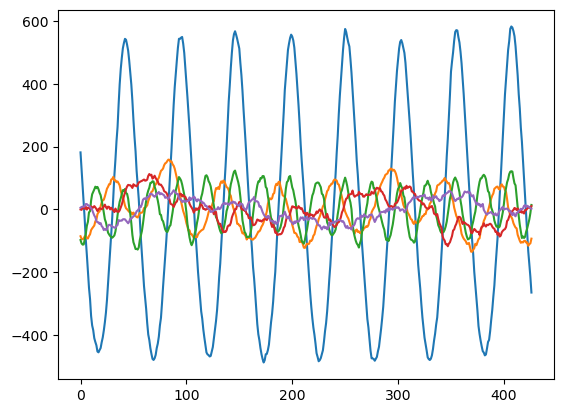

In [3]:
plt.figure()
plt.plot(data_train[:,0])
plt.plot(data_train[:,1])
plt.plot(data_train[:,2])
plt.plot(data_train[:,3])
plt.plot(data_train[:,4])
plt.show()

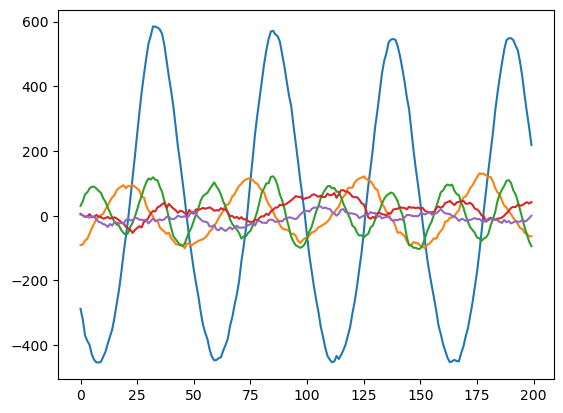

In [4]:
plt.figure()
plt.plot(data_valid[:,0])
plt.plot(data_valid[:,1])
plt.plot(data_valid[:,2])
plt.plot(data_valid[:,3])
plt.plot(data_valid[:,4])
plt.show()

In [5]:
print(data_train.shape)
print(data_valid.shape)

(427, 5)
(200, 5)


In [6]:
# with open("./Simulation_Data/lorenz3D_data.pickle", "rb") as file:
#     # Pickle the "data" dictionary using the highest protocol available.
#     data = pickle.load(file)
#     u = data["u"]
#     sigma = data["sigma"]
#     beta = data["beta"]
#     rho = data["rho"]
#     dt = data["dt"]
n = data_train.shape[0]
dt = 1
N_train = 427
N_test = 100
sigma = -1
beta = -1
rho = -1

# dudt = (u[1:]-u[:-1])/dt
# u = u[:-1,:]

# u_train = u[:N_train, :]
# u_test = u[N_train:N_train+N_test, :]

# dudt_train = dudt[:N_train, :]
# dudt_test = dudt[N_train:N_train+N_test, :]
u_train = data_train[:N_train-1,:]
u_test = data_valid[:-1,:]
dudt_train = (data_train[1:]-data_train[:-1])/dt #why du/dt
dudt_train = dudt_train[:N_train]
dudt_test = (data_valid[1:]-data_valid[:-1])/dt
dudt_test = dudt_test[:]
train_input_sequence = u_train
train_target_sequence = dudt_train
test_input_sequence = u_test
test_target_sequence = dudt_test

print("Number of training samples: {}".format(train_input_sequence.shape))
print("Number of testing samples: {}".format(test_input_sequence.shape))

attractor_std = np.std(train_input_sequence, axis=0)

dl_max = 40
pl_max = 20
max_idx = np.shape(test_input_sequence)[0] - pl_max
min_idx = dl_max
idx = np.arange(min_idx, max_idx)
np.random.shuffle(idx)
testing_ic_indexes = idx

print("Shape of initial conditions: {:}".format(testing_ic_indexes.shape))

data = {
"train_input_sequence":train_input_sequence,
"train_target_sequence":train_target_sequence,
"attractor_std":attractor_std,
"dt":dt,"sigma":sigma,
"beta":beta,
"rho":rho,
}

with open("./Data/newmodel1/new1_training_data_N{:d}.pickle".format(N_train), "wb") as file:
    # Pickle the "data" dictionary using the highest protocol available.
    pickle.dump(data, file, pickle.HIGHEST_PROTOCOL)

data = {
"test_input_sequence":test_input_sequence,
"test_target_sequence":test_target_sequence,
"attractor_std":attractor_std,
"testing_ic_indexes":testing_ic_indexes,
"dt":dt,"sigma":sigma,
"beta":beta,
"rho":rho,
}

with open("./Data/newmodel1/new1_testing_data_N{:d}.pickle".format(N_train), "wb") as file:
    # Pickle the "data" dictionary using the highest protocol available.
    pickle.dump(data, file, pickle.HIGHEST_PROTOCOL)

Number of training samples: (426, 5)
Number of testing samples: (199, 5)
Shape of initial conditions: (139,)
